## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [126]:
import pandas as pd

dataset = pd.read_csv("./titanic.csv")

print("Basic statistical information for numerical variables:")
print(dataset.describe())

print("\nDataset dimensions:")
print(dataset.shape)

print("\nVariable types and data count:")
print(dataset.info())


Basic statistical information for numerical variables:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Dataset dimensions:
(891,

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [127]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

Є пропускі в Age (177), Cabin (687), Embarked (2). Пропуски в Embarked не сильно вплине на роботу, а пропуски в Age та Cabin можуть повпливати на неї.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



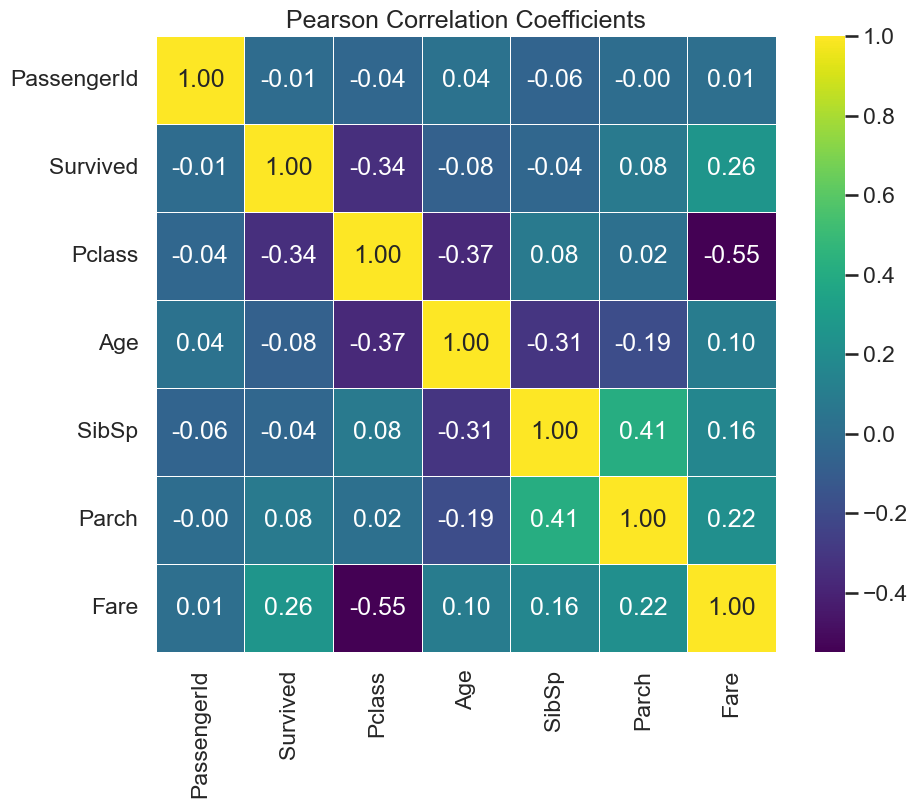

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("./titanic.csv")

numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
numeric_dataset = dataset[numeric_columns]

correlation_matrix = numeric_dataset.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Coefficients')
plt.show()

Ваші висновки:

Найвищі коеф. мають Pclass - Fare (-0.55), Parch - SibSp (0.41), Age - Pclass (-0.37), SibSp - Age (-0.31), Parch - Fare (0.22). Вони матимуть важливу функцію під часу аналізу.

Інші пари мають не високі коефіціенти, вони під час аналізу не допоможуть нам.


**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [129]:
import pandas as pd
from IPython.display import display

dataset = pd.read_csv("./titanic.csv")

def fill_missing_values(df, column_name: str, groupby_columns):
    df_copy = df.copy()
    df_copy[column_name] = df_copy.groupby(groupby_columns)[column_name].transform(lambda x: x.fillna(x.median()))
    return df_copy

print("First ten rows of the original dataset:")
display(dataset.head(10))

filled_dataset = fill_missing_values(dataset, "Age", ["Pclass", "Sex"])
print("\nFirst ten rows of the filled dataset:")
display(filled_dataset.head(10))

med_bef = dataset["Age"].median()
med_aft = filled_dataset["Age"].median()
print(f"\nMedian age before filling: {med_bef}")
print(f"Median age after filling: {med_aft}")

print("\nNumber of missing values after filling:")
display(filled_dataset.isnull().sum())


First ten rows of the original dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



First ten rows of the filled dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Median age before filling: 28.0
Median age after filling: 26.0

Number of missing values after filling:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Тепер колонка Age не містить пропущених значень, це допоможе нам в подальшому аналізі. Використали медіану, вона нам потрібна щоб правильно заповнити пропущенні данні, вік через це змінився з 28 до 26.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





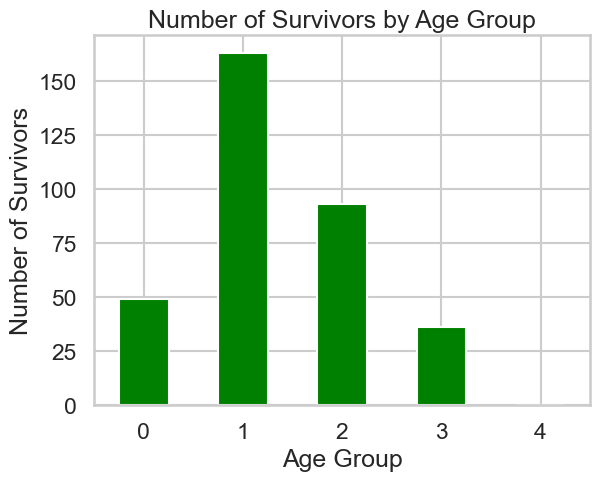

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

processed_dataset = filled_dataset.copy()

bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]
processed_dataset['Age_bin'] = pd.cut(processed_dataset['Age'], bins=bins, labels=labels, right=False)

survived_by_age_bin = processed_dataset.groupby('Age_bin', observed=False)['Survived'].sum()
survived_by_age_bin.plot(kind='bar', color='green')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Age Group')
plt.xticks(rotation=0)
plt.show()


Ваші висновки:

Бачимо на графіку що найбільше людей вижило з 1-ої категорії (16-32р.), а найменше з 4-ої категорії (64-80р.)

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

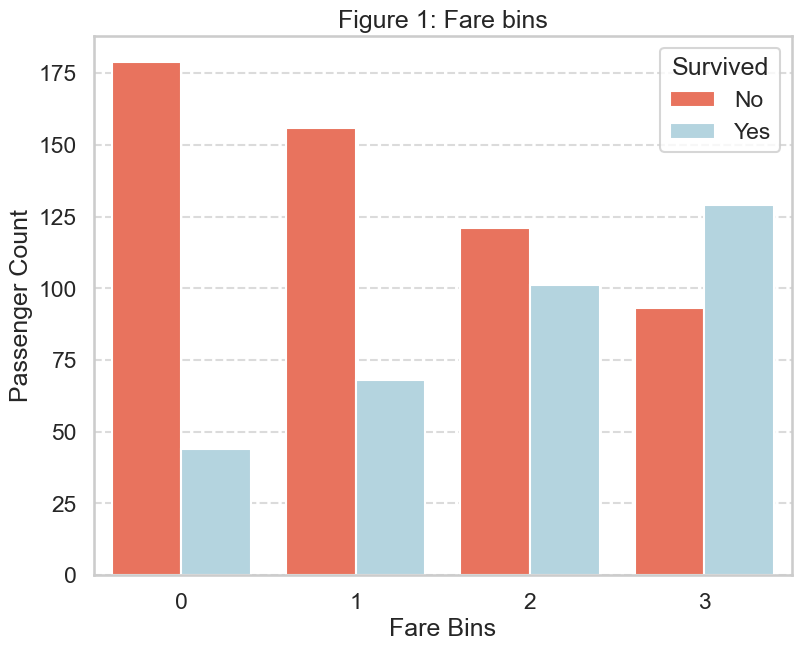

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

processed_dataset['fare_bins'] = pd.qcut(processed_dataset['Fare'], 4, labels=[0, 1, 2, 3])

fig, ax1 = plt.subplots(1, 1, figsize=(9, 7))
sns.countplot(data=processed_dataset, x="fare_bins", hue="Survived", palette=['#FF6347', '#ADD8E6'], ax=ax1)
ax1.set_title("Figure 1: Fare bins")
ax1.set_xlabel("Fare Bins")
ax1.set_ylabel("Passenger Count")
ax1.legend(title="Survived", labels=["No", "Yes"])
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

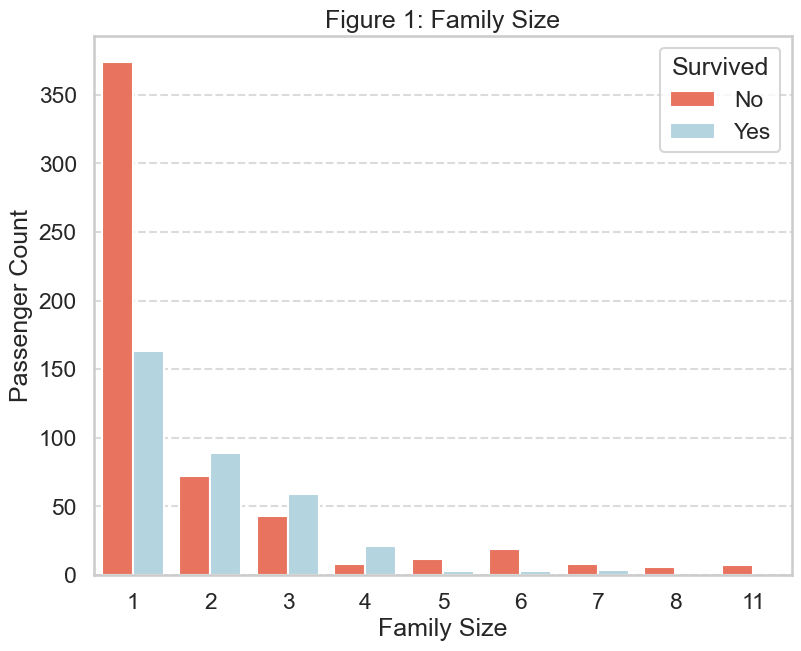

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

processed_dataset['Family_size'] = processed_dataset['Parch'] + processed_dataset['SibSp']

processed_dataset['Alone'] = processed_dataset['Family_size'].apply(lambda x: 1 if x == 0 else 0)

fig, ax1 = plt.subplots(1, 1, figsize=(9, 7))
sns.countplot(data=processed_dataset, x=processed_dataset['Family_size']+1, hue="Survived", palette=['#FF6347', '#ADD8E6'], ax=ax1)
ax1.set_title("Figure 1: Family Size")
ax1.set_xlabel("Family Size")
ax1.set_ylabel("Passenger Count")
ax1.legend(title="Survived", labels=["No", "Yes"])
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Ваші висновки:

За цією статистикою можемо визначити що сім'ї які приїжджали 5+ людей майже не вижили, найбільше було від 1 до 3 людей. Сім'ї які мало родичів мали більше шанс на виживання аніж великі сім'ї. Отже, кількість людей в сім'ї дуже впливало на шанс врятуватись.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [133]:
import pandas as pd

processed_dataset.drop(["Cabin", "Ticket", "PassengerId"], axis="columns", inplace=True)
print(processed_dataset.head(5))

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_bin fare_bins  \
0    male  22.0      1      0   7.2500        S       1         0   
1  female  38.0      1      0  71.2833        C       2         3   
2  female  26.0      0      0   7.9250        S       1         1   
3  female  35.0      1      0  53.1000        S       2         3   
4    male  35.0      0      0   8.0500        S       2         1   

   Family_size  Alone  
0            1      0  
1            1      0  
2            0      1  
3            1      0  
4            0      

Ваші висновки:

Cabin - багато пропущенних значень, для аналізу нам це не потрібно.
Ticket - містить номер квитка, не потрібна інформація.
PassengerId - чимось віддаленно схоже на Ticket, теж не буде користно.


***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [134]:
processed_dataset["Title"] = processed_dataset["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

num_df = processed_dataset.copy()

title_map = {title: ind for ind, title in enumerate(num_df['Title'].unique())}
sex_map = {"female": 0, "male": 1}
embarked_map = {"S": 0, "Q": 1, "C": 2}

num_df["Title"] = num_df["Title"].map(title_map)
num_df["Sex"] = num_df["Sex"].map(sex_map)
num_df["Embarked"] = num_df["Embarked"].map(embarked_map)

display(num_df.head(20))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,fare_bins,Family_size,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,1,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0,2,3,1,0,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,1,1,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,2,3,1,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,2,1,0,1,0
5,0,3,"Moran, Mr. James",1,25.0,0,0,8.4583,1.0,1,1,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,0.0,3,3,0,1,0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,0.0,0,2,4,0,3
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0.0,1,1,2,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,2.0,0,2,1,0,1


Ваші висновки:

Перетворили колонки Sex, Embarked та Title в числові значення для подальшого використання їх у моделюванні.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



C:\Users\akkio\AppData\Local\Temp\ipykernel_11580\1396923769.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


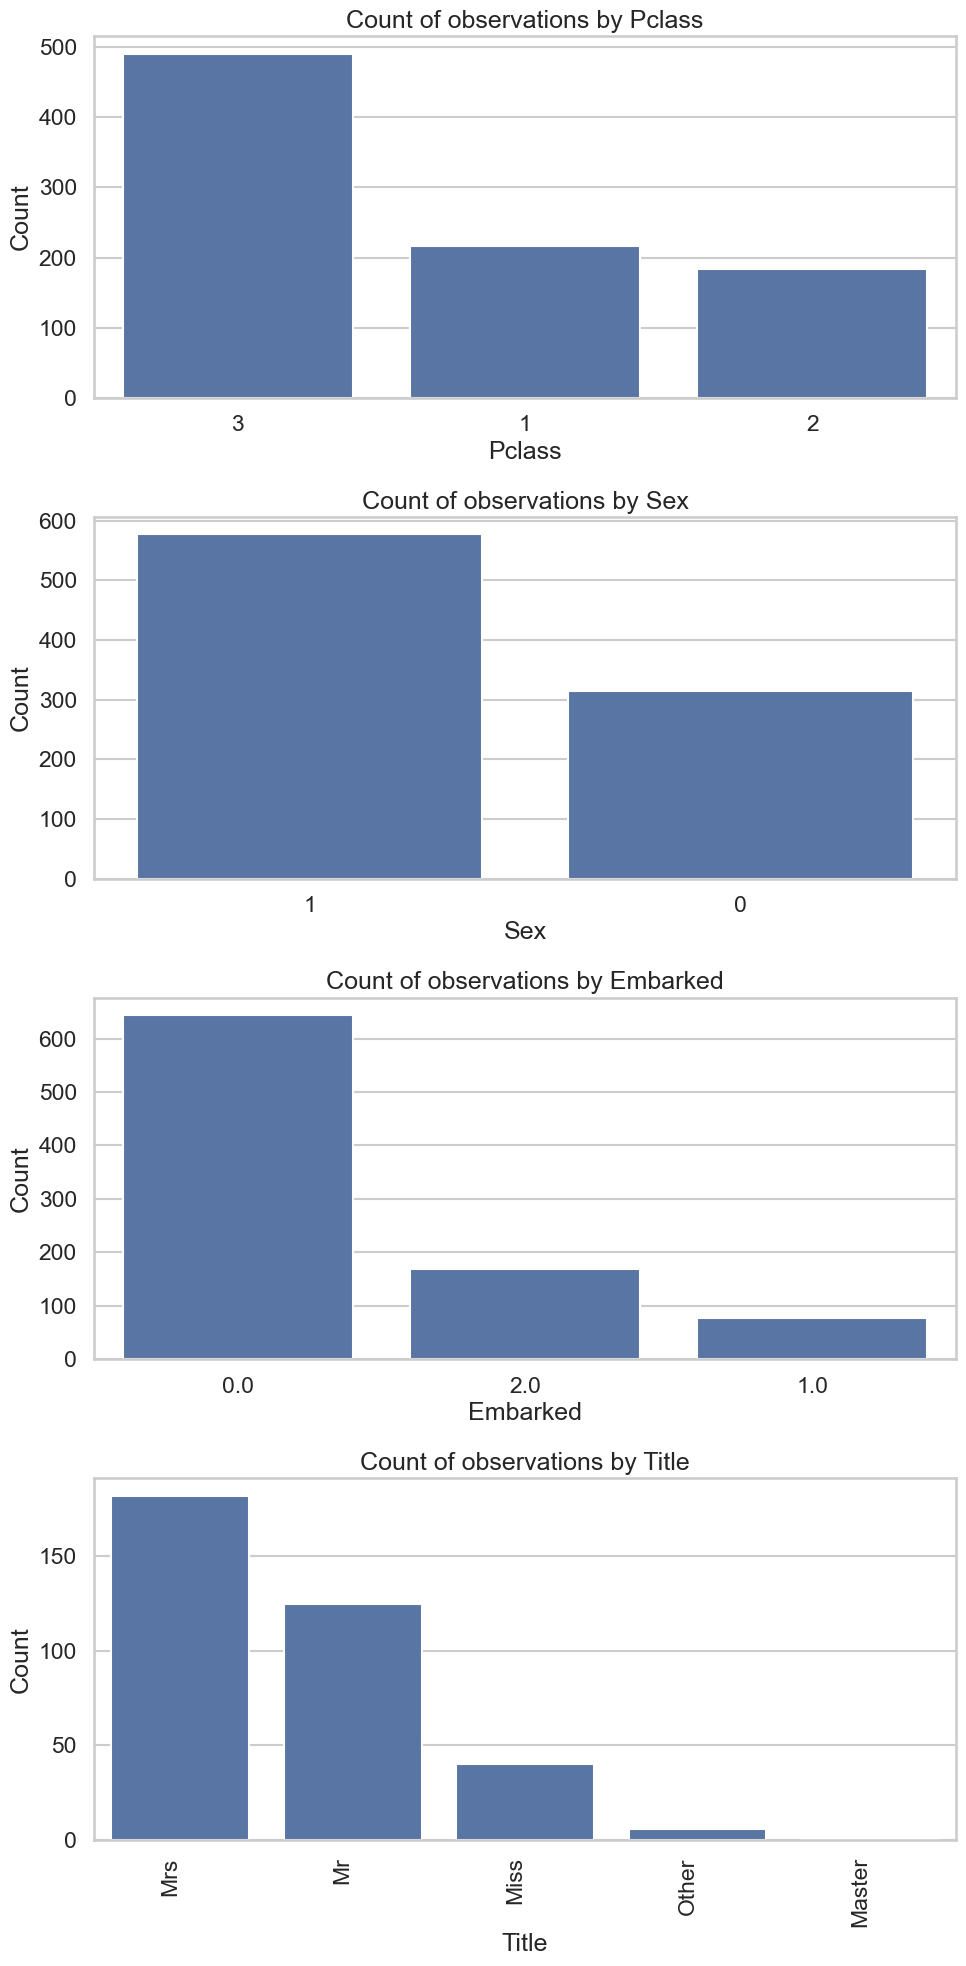

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Pclass', 'Sex', 'Embarked', 'Title']

title_map = {
    1: 'Mr',
    2: 'Mrs',
    3: 'Miss',
    4: 'Master',
    5: 'Other'
}
num_df['Title'] = num_df['Title'].map(title_map)

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, len(categorical_vars)*5))
for var, ax in zip(categorical_vars, axes):
    sns.countplot(data=num_df, x=var, ax=ax, order=num_df[var].value_counts().index)
    ax.set_title(f'Count of observations by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    if var == 'Title':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()


Ваші висновки:

Pclass - бачимо що пасажирів 3-ого класу було найбільше на кораблі, через ціну квитка, вона була найменшою.

Sex - на діаграмі видно що к-сть чоловіків була більшою за к-сть жінок.

Embarked - зображено місце посадки пасажирів на Титанік, бачимо що більшість людей сіло в м. Southampton (0).

Title - ((Не зміг знайти помилку в коді, по ідеї має бути найбільше Mr))

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [139]:
#code

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [137]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.